In [24]:
# Importing libraries
import pandas as pd
import numpy as np

# Read csv file into a pandas dataframe
df = pd.read_csv("propertydata.csv")

# Take a look at the first few rows
df.columns.tolist()

['PID',
 'ST_NUM',
 'ST_NAME',
 'OWN_OCCUPIED',
 'NUM_BEDROOMS',
 'NUM_BATH',
 'SQ_FT']

In [19]:
df.shape

(9, 7)

In [20]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


In [25]:
df['PID']

0    100001000.0
1    100002000.0
2    100003000.0
3    100004000.0
4            NaN
5    100006000.0
6    100007000.0
7    100008000.0
8    100009000.0
Name: PID, dtype: float64

In [4]:
print(df['ST_NUM'])
print(df['ST_NUM'].isnull())

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64
0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool


In [5]:
print(df['NUM_BEDROOMS'])
print(df['NUM_BEDROOMS'].isnull())

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7      1
8     na
Name: NUM_BEDROOMS, dtype: object
0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool


In [7]:
missing_values = ["n/a", "na", "--"]
#df1 = pd.read_csv("E:\\2019-20\\ML\\propertydata.csv")
df1 = pd.read_csv("E:\\2019-20\\ML\\propertydata.csv", na_values = missing_values)
print(df1['NUM_BEDROOMS'])
print(df1['NUM_BEDROOMS'].isnull())

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    1.0
8    NaN
Name: NUM_BEDROOMS, dtype: float64
0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
Name: NUM_BEDROOMS, dtype: bool


In [8]:
# Detecting numbers 
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [9]:
print(df['OWN_OCCUPIED'])

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object


In [10]:
print(df.isnull().sum())

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64


In [11]:
print(df.isnull().sum().sum())
print(df.isnull().values.any())


9
True


In [12]:
df1['ST_NUM'].fillna(125, inplace=True)

In [13]:
print(df1['ST_NUM'])

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64


In [14]:
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'], 
        'age': [42, np.nan, 36, 24, 73], 
        'sex': ['m', np.nan, 'f', 'm', 'f'], 
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [15]:
#Drop missing observations
df_no_missing = df.dropna()
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [16]:
#Drop rows where all cells in that row is NA
df_cleaned = df.dropna(how='all')
df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [17]:
#Create a new column full of missing values
df['location'] = np.nan
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [18]:
#Drop column if they only contain missing values
df.dropna(axis=1, how='all')


,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [19]:
#Drop rows that contain less than five observations
df.dropna(thresh=5)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [20]:
#Fill in missing data with zeros
df.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,0.0
1,0,0,0.0,0,0.0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0,0.0
4,Amy,Cooze,73.0,f,3.0,70.0,0.0


In [22]:
#Fill in missing in postTestScore with each sex’s mean value of postTestScore
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df
df["postTestScore"].fillna(df.groupby("sex")["postTestScore"].transform("mean"), inplace=True)
print(df)

  first_name last_name   age  sex  preTestScore  postTestScore
0      Jason    Miller  42.0    m           4.0           25.0
1        NaN       NaN   NaN  NaN           NaN            NaN
2       Tina       Ali  36.0    f           NaN           70.0
3       Jake    Milner  24.0    m           2.0           62.0
4        Amy     Cooze  73.0    f           3.0           70.0


In [23]:
#Select some rows but ignore the missing data points
df[df['age'].notnull() & df['sex'].notnull()]

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,70.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [24]:
dataSet = pd.read_csv("E:\\2019-20\\Udemy\\part1\\Data.csv")

In [25]:
dataSet

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [26]:
X = dataSet.iloc[:,:-1].values
y= dataSet.iloc[:,:3].values

In [27]:
from sklearn.preprocessing import Imputer

In [28]:
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])


C:\Users\Prakash P\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [30]:
import missingno as msno

In [31]:
dataSet.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

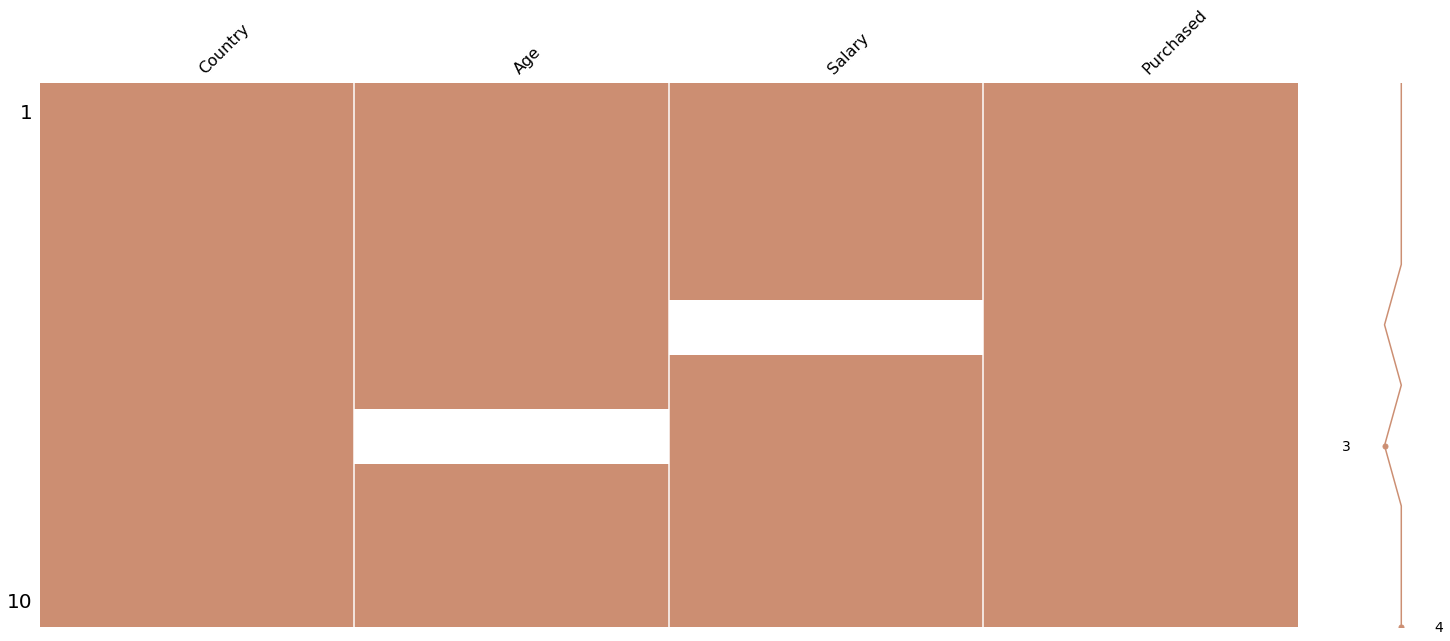

In [32]:
msno.matrix(dataSet,color=(0.8, 0.56, 0.45))

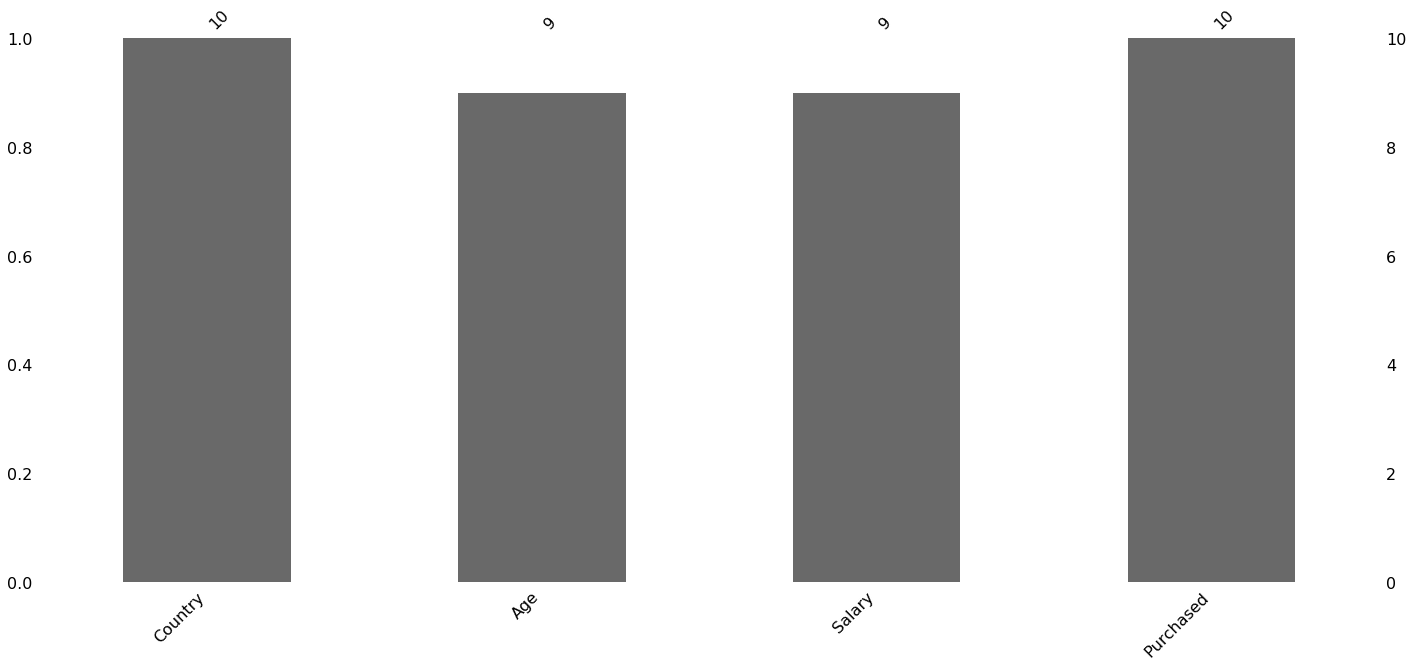

In [33]:
msno.bar(dataSet)